In [11]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Data
DF = pd.read_csv('Loan_Data.csv')
DF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Droping Loan ID since it is not usefull in prediction
DF.drop('Loan_ID' , axis = 1 , inplace = True)

#### Checking basic details of the data

In [5]:
DF.shape

(614, 12)

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
DF.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
DF.duplicated().sum()

np.int64(0)

1. To avoid further complications we are making sure that **Gender** , **Married** , **Dependents** and **Self_Employed** column should be **Encoded** to make it **Numerical**.
2. **LoanAmount** and **Loan_Amount_Term** columns should be of **Integer** data types.
3. Since we have missing values we will impute first and then we will transform

### Imputation of Missing Data   (Just checking will do it after train test split)
##### We can impute by 3 Methods 
1. Mean
2. Median
3. Mode

**Gender** , **Married** , **Dependents** , **Self_Employed** , **LoanAmount** , **Loan_Amount_Term** and **Credit_History** columns having NA.

**Which method is used to when ?**
1. Use **Mean** when data is **normally distributed** and **no extreme outliers** are present.
2. Use **Median** when data is **skewed** or **contains outliers**, as it's more robust.
3. Use **Mode** for **categorical** data or when a value occurs most frequently.


> Data Type
1. NA Categorical columns: [ Gender , Married , Dependents , Self_Employed ]
2. NA Numerical columns: [ LoanAmount , Loan_Amount_Term , Credit_History ]
##### For numerical columns first we check that if it contains outliers or not so that we can decide whether to impute by mean or median 

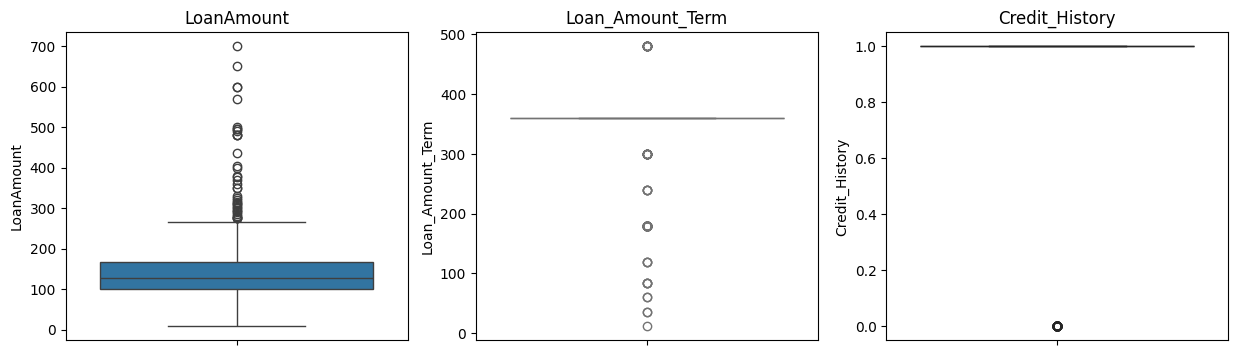

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

#Age
sns.boxplot(DF['LoanAmount'],ax=axs[0])
axs[0].set_title('LoanAmount')

#Experience_Years
sns.boxplot(DF['Loan_Amount_Term'],ax=axs[1],color='lightgreen')
axs[1].set_title('Loan_Amount_Term')

#Annual_Review_Score
sns.boxplot(DF['Credit_History'],ax=axs[2],color='green')
axs[2].set_title('Credit_History'); # the ; suppresses this to be printed on the screen | can also be assigned to a variable to hide

1. From above boxplots we can see that **LoanAmount**  has outliers so that we have to impute missing values by **median** since median not affected by outliers.
2. **Loan_Amount_Term** and **Credit_History** it does have outliers so but they are taking distinct values such as [1,0] or [360,120,...]  so here we can impute missing values by **Mode**.

In [9]:
NA_Categorical_columns = [ 'Gender' , 'Married' , 'Dependents' , 'Self_Employed' ]

for col in DF.columns:
    if col not in NA_Categorical_columns:
        continue
    print(DF[col].value_counts())
    print('\n')

Gender
Male      489
Female    112
Name: count, dtype: int64


Married
Yes    398
No     213
Name: count, dtype: int64


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Self_Employed
No     500
Yes     82
Name: count, dtype: int64




We will impute missing values for categorical columns by mode and for numerical medain or mode but after train test split to avoid **Data Leakage**
# Encoding (Just checking w'll do it after train test split)
#### Since ML Algorithms can't understand non-numeric data we have to convert categories into numeric data like 0-1[Binary] 1,2,3[levels] etc 
We have **Gender** , **Married** , **Dependents** , **Education** , **self_employed** and **property_area** are non-numerical columns we will handle each column one by one
## To convert categorical data into numeric we have different encoding technics - 

1. One-Hot Encoding (For Nominal Data – No Order)
> Converts each category into a new binary column.

2. Label Encoding (For Ordinal Data – Ordered)
> Assigns a unique integer to each category.

3. Ordinal Encoding (Manual Order)
> Map each category to a number based on real-world order.

We don't know which encoding technic should we use for a column to get to know that first we check its value counts and then we will move forward

In [10]:
for col in DF.columns:
    if DF[col].dtype == 'object':
        print(DF[col].value_counts())
        print('\n')

Gender
Male      489
Female    112
Name: count, dtype: int64


Married
Yes    398
No     213
Name: count, dtype: int64


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     500
Yes     82
Name: count, dtype: int64


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


Loan_Status
Y    422
N    192
Name: count, dtype: int64




1. On inspecting we are having most of columns binary and doesn't have inherient order so here we can use **one hot encoding**.
2. But for **Dependents** we can simply 3+ by 3 and apply **ordinal encoding** since there is order but we can use **one hot encoding** also.
3. And for **Property area** there might be order so here also we can use **ordinal encoding** and if are not sure then we can use **one hot encoding** also.
4. We will do encoding after train test split to avoid **data leakage**.

## Exploratory Data Analysis

In [11]:
X = DF.drop('Loan_Status',axis=1)  #Independent
Y = DF['Loan_Status']              #Dependent

<Axes: xlabel='Loan_Status', ylabel='count'>

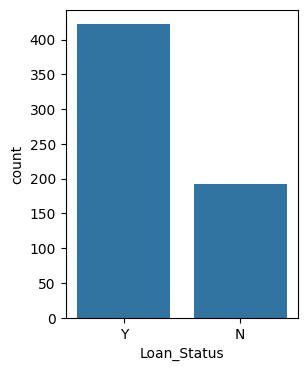

In [12]:
plt.figure(figsize=(3,4))
sns.barplot(Y.value_counts())

Text(0.5, 1.0, 'Loan Status by Gender')

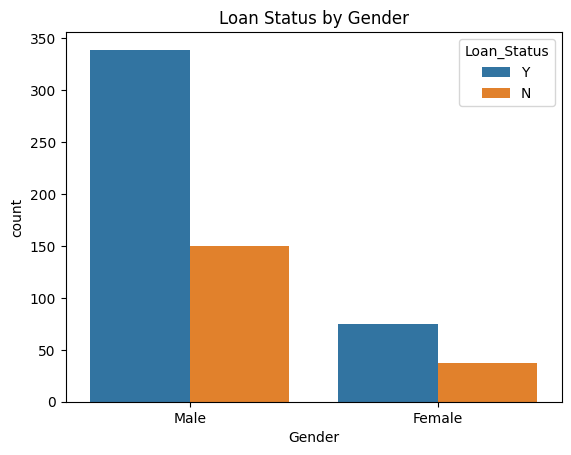

In [17]:
sns.countplot(x='Gender', data=DF , hue=Y)
plt.title('Loan Status by Gender')

Text(0.5, 1.0, 'Loan Amount Distribution ')

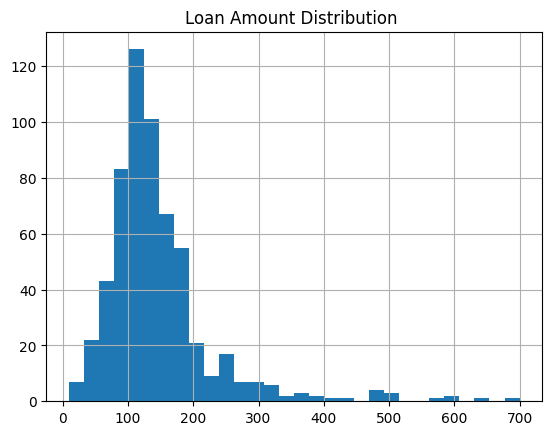

In [13]:
DF['LoanAmount'].hist(bins=30)
plt.title('Loan Amount Distribution ')

Text(0.5, 1.0, 'Loan Amount by Loan Status')

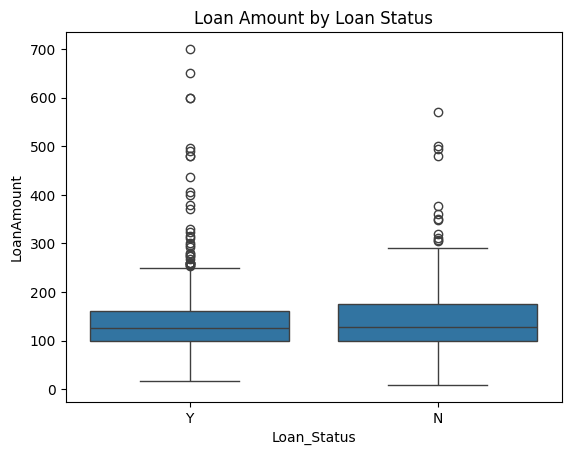

In [14]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=DF)
plt.title('Loan Amount by Loan Status')

Text(0.5, 1.0, 'Applicant Income')

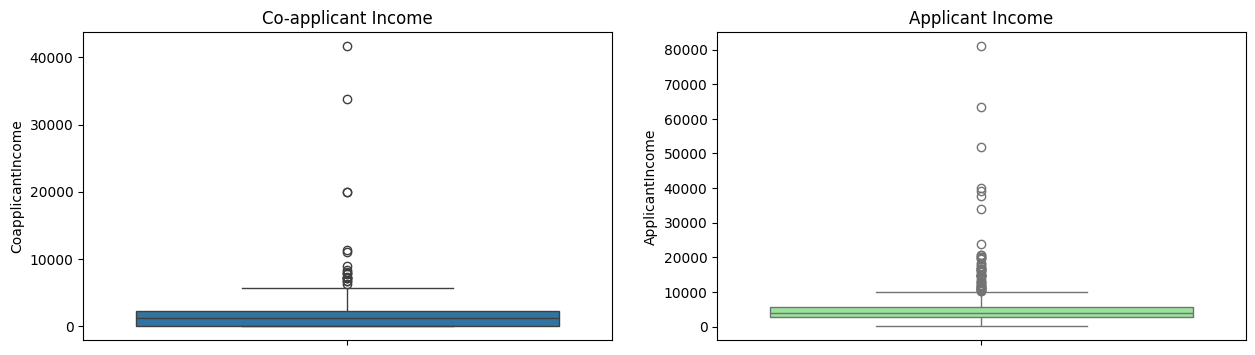

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

#CoapplicantIncome
sns.boxplot(DF['CoapplicantIncome'],ax=axs[0])
axs[0].set_title('Co-applicant Income')

#ApplicantIncome
sns.boxplot(DF['ApplicantIncome'],ax=axs[1],color='lightgreen')
axs[1].set_title('Applicant Income')

### Train Test Split

In [22]:
%pip install scikit-learn

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.2 MB 15.3 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.2 MB 15.5 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.2 MB 16.4 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 15.9 MB/s  0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   --- ------------------------------------ 3.9/46.2 MB 19.6 MB/s eta 0:00:03
   ------ --------------------------------- 7.9/46.2 MB 19.5 MB/s eta 0:00:02
   --------- ------------------------------ 11.5/46.2 MB 18.5 MB/s eta 0:00:02
   ------------- -------------------------- 16.0/46.2 MB 19.0 MB/s eta 0:00:02
   ------------------ --------------------- 21.0/46.2 MB 19.8 MB/s eta 0:00:02
   ---------------------- ----------------- 26.0/46.2 MB 20.3 MB/s eta 0:00:01
   -------------------------- ------------- 30.7/46.2 MB 20.7 MB/s eta 0:00:0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nltk 3.8.1 requires click, which is not installed.
nltk 3.8.1 requires regex>=2021.8.3, which is not installed.
nltk 3.8.1 requires tqdm, which is not installed.


In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=10)

In [18]:
x_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
260,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban
303,Male,Yes,1,Graduate,No,1625,1803.0,96.0,360.0,1.0,Urban


In [19]:
y_test.head(2)

285    Y
323    Y
Name: Loan_Status, dtype: object

In [20]:
x_test.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
285,Male,No,0,Graduate,No,3158,3053.0,89.0,360.0,1.0,Rural
323,Female,No,0,Graduate,No,3166,2985.0,132.0,360.0,NaN,Rural


In [23]:
y_train.head(2)

260    Y
303    Y
Name: Loan_Status, dtype: object

## Pipeline + Column Transformer

1. Imputation of missing values
2. Encoding Categorical Values
3. Scaling Data

In [24]:
# For preprocessing and pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# For handling missing values
from sklearn.impute import SimpleImputer

# For encoding categorical variables
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [25]:
# Numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Categorical pipeline 
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False , drop='first'))
])

# Ordinal pipeline 
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[['0', '1', '2', '3+'], ['Rural', 'Semiurban', 'Urban']]))
])


# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']),
    ('cat', categorical_pipeline, ['Gender', 'Married', 'Education', 'Self_Employed']),
    ('ord', ordinal_pipeline, ['Dependents', 'Property_Area'])
], remainder='passthrough')


In [26]:
# Fitting on training data only to prevent data leakage
X_train_transformed = preprocessor.fit_transform(x_train)

In [27]:
X_train = pd.DataFrame(X_train_transformed)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,330.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,6083.0,4250.0
1,96.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1625.0,1803.0
2,66.0,360.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2213.0,0.0
3,134.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2060.0,2209.0
4,95.0,360.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,2666.0,2083.0


In [28]:
ohe = preprocessor.named_transformers_['cat'].named_steps['encoder']
ohe_features= ohe.get_feature_names_out(['Gender', 'Married', 'Education', 'Self_Employed'])

In [29]:
all_column_names = [
    'LoanAmount',
    'Loan_Amount_Term',
    'Credit_History',
    *ohe_features,
    'Dependents',
    'Property_Area',
    'ApplicantIncome',
    'CoapplicantIncome'
]

In [30]:
X_train = pd.DataFrame(X_train_transformed, columns=all_column_names)
X_train.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents,Property_Area,ApplicantIncome,CoapplicantIncome
0,330.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,6083.0,4250.0
1,96.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1625.0,1803.0
2,66.0,360.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2213.0,0.0
3,134.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2060.0,2209.0
4,95.0,360.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,2666.0,2083.0


## Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [33]:
scaler = StandardScaler()

# Fitting on training data only to prevent data leakage
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_train.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents,Property_Area,ApplicantIncome,CoapplicantIncome
0,2.068089,0.247102,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.075399,0.825530
1,-0.605934,0.247102,1.0,1.0,1.0,0.0,0.0,1.0,2.0,-0.598270,0.048356
2,-0.948757,0.247102,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.509414,-0.524281
3,-0.171691,0.247102,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.532535,0.177303
4,-0.617361,0.247102,1.0,1.0,1.0,0.0,0.0,3.0,0.0,-0.440960,0.137285


## Transforming Test Data as well

In [34]:
X_test_transformed = preprocessor.transform(x_test)

In [35]:
X_test = pd.DataFrame(X_test_transformed)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,89.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3158.0,3053.0
1,132.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3166.0,2985.0
2,128.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2083.0,3150.0
3,187.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,5708.0,5625.0
4,185.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4683.0,1915.0


In [36]:
X_test = pd.DataFrame(X_test_transformed, columns=all_column_names)
X_test.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents,Property_Area,ApplicantIncome,CoapplicantIncome
0,89.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3158.0,3053.0
1,132.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3166.0,2985.0
2,128.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2083.0,3150.0
3,187.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,5708.0,5625.0
4,185.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4683.0,1915.0


In [37]:
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
X_test.head(2)

,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents,Property_Area,ApplicantIncome,CoapplicantIncome
0,-0.685926,0.247102,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.366611,0.445360
1,-0.194546,0.247102,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.365402,0.423763


# Target column

In [38]:
y_train.head()

260    Y
303    Y
407    Y
261    Y
352    Y
Name: Loan_Status, dtype: object

In [39]:
y_test.head()

285    Y
323    Y
482    Y
173    Y
518    N
Name: Loan_Status, dtype: object

In [40]:
Y_train = y_train.map({'Y': 1, 'N': 0})
Y_test = y_test.map({'Y': 1, 'N': 0})

In [41]:
Y_train.head()

260    1
303    1
407    1
261    1
352    1
Name: Loan_Status, dtype: int64

In [42]:
Y_test.head()

285    1
323    1
482    1
173    1
518    0
Name: Loan_Status, dtype: int64

# Trying Logistic Regression 

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [44]:
model = LogisticRegression(random_state=10)
model.fit(X_train, Y_train)

LogisticRegression(random_state=10)

In [45]:
# Predictions
y_pred = model.predict(X_test)

In [46]:
# Evaluation
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.7967479674796748


In [48]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Confusion Matrix:
 [[12 24]
 [ 1 86]]


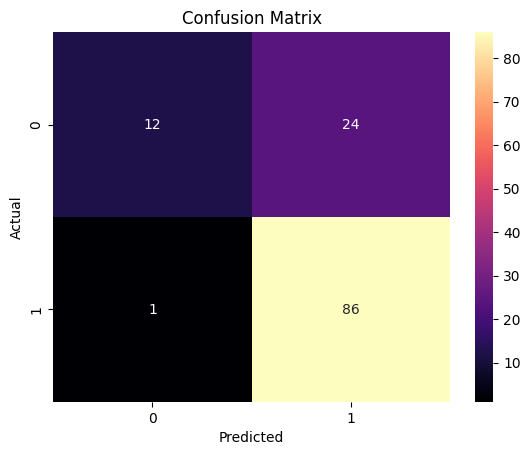

In [49]:
sns.heatmap(confusion_matrix(Y_test, y_pred),annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
print("Classification Report:\n", classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.33      0.49        36
           1       0.78      0.99      0.87        87

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.82      0.80      0.76       123



1. The classification report shows that the model is very good at predicting loan approvals (class 1), with a high recall of 99%. This means the model almost never misses an actual loan approval.

2. However, the model struggles with correctly predicting rejections (class 0), with only 33% recall. This means it often wrongly predicts loan approvals even when the applicant should be rejected. 

In [51]:
print("ROC AUC:", roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

ROC AUC: 0.7337164750957854


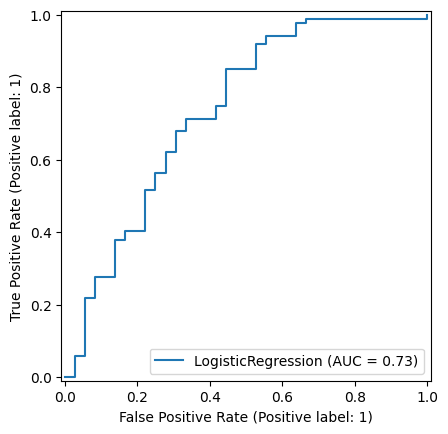

In [52]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, Y_test)
plt.show()

The ROC-AUC score of 0.73 indicates that the model performs fairly well in distinguishing between approved and rejected loan applications. The curve leaning towards the top-left suggests the model has learned useful patterns from the data. However, there is still scope for improvement through additional feature engineering or using more algorithms or GridsearchCV.

## class_weight='balanced' Equally treating both the categories 

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', random_state=10)
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', random_state=10)

In [54]:
# Evaluate again
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.44      0.55        36
           1       0.80      0.93      0.86        87

    accuracy                           0.79       123
   macro avg       0.76      0.69      0.71       123
weighted avg       0.78      0.79      0.77       123



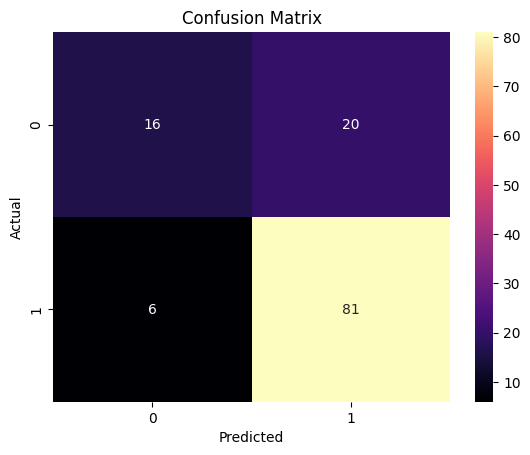

In [56]:
sns.heatmap(confusion_matrix(Y_test, y_pred),annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1. After applying class_weight='balanced', the model became better at detecting loan rejections (class 0).

2. The recall for loan rejections improved from 33% to 44%, meaning the model is now catching more true rejections than before.

3. Although this caused a small drop in precision for approvals, this trade-off is acceptable because the model now gives more balanced attention to both approval and rejection classes.

4. This demonstrates that adjusting class weights is an effective method when working with slightly imbalanced datasets.

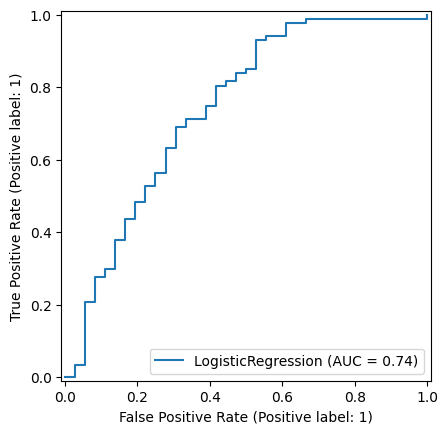

In [57]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, Y_test)
plt.show()

Using class_weight='balanced' helped improve the model’s ability to detect loan rejections (minority class) through better Recall. However, it had minimal impact on ROC AUC because ROC AUC reflects the model's ranking ability across thresholds, not class balance directly

# GridsearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'solver': ['liblinear', 'saga']  
}

In [59]:
grid = GridSearchCV(LogisticRegression(random_state=10, max_iter=1000),
                    param_grid, cv=5, scoring='roc_auc')

In [60]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=10),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc')

In [61]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [62]:
print("Best Score:", grid.best_score_)

Best Score: 0.7222797303803563


We applied GridSearchCV for hyperparameter tuning on C, penalty, and solver. While GridSearchCV optimized ROC AUC on cross-validation folds, my baseline Logistic Regression performed slightly better on unseen test data. This reinforces the principle that hyperparameter tuning doesn’t always outperform a well-regularized baseline model on small to medium datasets.

In [63]:
pd.Series(model.coef_[0], index=X_train.columns)

LoanAmount               -0.097399
Loan_Amount_Term         -0.004835
Credit_History            3.236087
Gender_Male              -0.087698
Married_Yes               0.528324
Education_Not Graduate   -0.343693
Self_Employed_Yes         0.038206
Dependents                0.088661
Property_Area             0.151998
ApplicantIncome           0.023560
CoapplicantIncome        -0.147767
dtype: float64

1. The coefficients show how each feature affects the chances of loan approval. A positive coefficient increases the likelihood of approval, while a negative coefficient decreases it.

2. Credit History has the highest positive impact, meaning applicants with a good credit history are far more likely to get loan approval. On the other hand, features like Loan Amount and Loan Term have a slight negative impact, suggesting that higher loan amounts or longer repayment terms slightly reduce approval chances.

# Key Insights from Evaluation:

## Classification Report (Final Balanced Model):
1. Improved detection of rejected loans (class 0) with Recall rising to 44%.
2. Maintained strong Recall for approved loans (class 1) at 93%.
3. F1-scores showed a more balanced performance after adjusting for imbalance.

## ROC AUC Curve:
1. The ROC AUC score remained around 0.73, indicating consistent ability to separate the classes.
2. class_weight='balanced' influenced Recall/F1 more than ROC AUC, as expected.


1. The Logistic Regression model successfully predicted loan approvals with fair performance (ROC AUC ≈ 0.73). Initially, the model struggled to detect loan rejections due to class imbalance. By applying class_weight='balanced', we improved the model's ability to catch rejected applications (Recall for class 0 improved from 33% to 44%) while maintaining strong performance for approvals.

2. This project highlights how preprocessing, careful evaluation, and adjustments like class weighting can lead to more balanced models in classification problems. Although ROC AUC stayed stable, the improvements in Recall make the model more reliable for business decision-making where rejecting risky applications correctly is important.

# Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [65]:
model = RandomForestClassifier(random_state=10)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=10)

In [66]:
# Evaluate again
y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.36      0.49        36
           1       0.78      0.95      0.86        87

    accuracy                           0.78       123
   macro avg       0.77      0.66      0.68       123
weighted avg       0.78      0.78      0.75       123



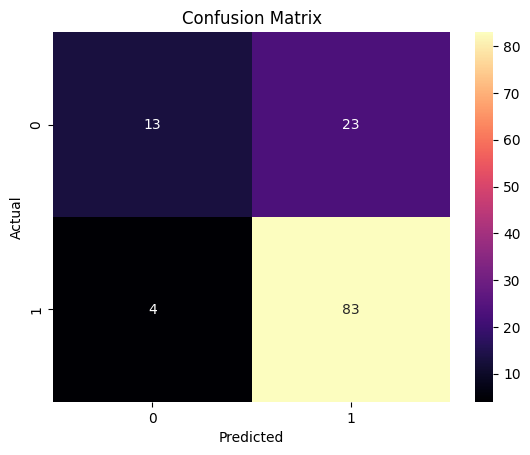

In [68]:
sns.heatmap(confusion_matrix(Y_test, y_pred),annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

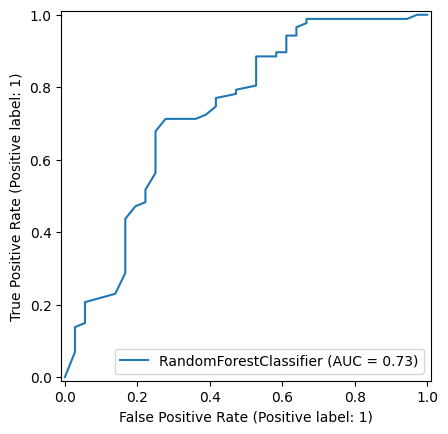

In [69]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, Y_test)
plt.show()